# Loading data

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

In [3]:
from __future__ import print_function
import numpy as np
from random import shuffle
import time
import csv
from PIL import Image
import os
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import initializers
from keras.optimizers import SGD
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential,load_model,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import *
from keras.callbacks import CSVLogger
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
import sys
sys.path.insert(0,'..')
from utils import lossprettifier

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\f

In [4]:
# for reproducibility
np.random.seed(3768)

# use this environment flag to change which GPU to use 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used

#Get TensorFlow session
def get_session(): 
  config = tf.ConfigProto() 
  config.gpu_options.allow_growth = True 
  return tf.Session(config=config) 
  
# One hot encoding of labels 
def dense_to_one_hot(labels_dense,num_clases=4):
  return np.eye(num_clases)[labels_dense]

In [5]:
# Preparing training and test sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [6]:
y_train = dense_to_one_hot(y_train,num_clases=3)
y_valid= dense_to_one_hot(y_valid,num_clases=3)

In [7]:
#Image data generation for the training 
datagen = ImageDataGenerator(
               featurewise_center = False, 
               samplewise_center = False,  # set each sample mean to 0
               featurewise_std_normalization = True,  
               samplewise_std_normalization = False)  

datagen.fit(x_train) 
for i in range(len(x_test)):
      x_test[i] = datagen.standardize(x_test[i])

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# Unsupervised pretraining

In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras import layers
from keras import models
from keras.models import *
from keras.layers import *
import tensorflow as tf

In [9]:
#CONV BLOCKS

input_shape = (224,224,3)
model = keras.Sequential()

#encoder

model.add(layers.Conv2D(2, (3, 3), activation='relu',padding='same',name='block1_conv1',kernel_initializer="he_normal",
                       input_shape=input_shape))
model.add(layers.Conv2D(2, (3, 3), activation='relu',padding='same',name='block1_conv2',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv2',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv2',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv3',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv4',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv2',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv3',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv4',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv2',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv3',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv4',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

#decoder

model.add(layers.UpSampling2D((2, 2), name='block5_up'))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv2_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv3_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(3, (3, 3), activation='sigmoid',padding='same',name='block5_conv4_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block4_up'))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv2_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv3_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='sigmoid',padding='same',name='block4_conv4_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block3_up'))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv2_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv3_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv4_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block2_up'))
model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv2_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block1_up'))
model.add(layers.Conv2D(2, (3, 3), activation='relu',padding='same',name='block1_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(3, (3, 3), activation='sigmoid',padding='same',name='block1_conv2_dec',kernel_initializer="he_normal"))
    
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 8)       

In [10]:
#Defining hyperparameters
batch_Size = 32
steps_Per_Epoch = 32
numEpochs = 50

#Instantating VGG19 model
#model = VGG19((224,224,3),classes=3) #VGG19_dense for revised VGG19, VGG19 for VGG19. Please pay attention to VGG16(), chnage the input shape and class number in VGG.py.

#Creating an optimizers
adaDelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer = sgd , loss = 'mean_squared_error', metrics = ['accuracy'])

#Creating early stopping 
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 50, verbose = 1, mode = 'auto', restore_best_weights = True)       

train_generator = datagen.flow(x_train, x_train, batch_size = batch_Size)
validation_generator = datagen.flow(x_valid, x_valid, batch_size = batch_Size)

# Model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_Per_Epoch,
    validation_data = validation_generator, 
    validation_steps = 16,
    epochs = numEpochs,
    shuffle = True, 
    verbose = 1)


Epoch 1/50
32/32 [==============================] - 52s 2s/step - loss: 19469.6586 - accuracy: 0.9662 - val_loss: 20567.0586 - val_accuracy: 0.9979: 19562.89
Epoch 2/50
32/32 [==============================] - 4s 117ms/step - loss: 19412.3076 - accuracy: 0.9980 - val_loss: 21474.5254 - val_accuracy: 0.9962
Epoch 3/50
32/32 [==============================] - 4s 116ms/step - loss: 19582.7501 - accuracy: 0.9952 - val_loss: 18750.2305 - val_accuracy: 0.9983
Epoch 4/50
32/32 [==============================] - 4s 118ms/step - loss: 19731.7198 - accuracy: 0.9973 - val_loss: 20355.6191 - val_accuracy: 0.9999
Epoch 5/50
32/32 [==============================] - 4s 114ms/step - loss: 19683.2388 - accuracy: 0.9979 - val_loss: 19920.3262 - val_accuracy: 0.9926
Epoch 6/50
32/32 [==============================] - 4s 114ms/step - loss: 19793.1241 - accuracy: 0.9968 - val_loss: 18261.2441 - val_accuracy: 0.9999
Epoch 7/50
32/32 [==============================] - 4s 117ms/step - loss: 19657.6252 - accu

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.141578). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


32/32 [==============================] - 9s 283ms/step - loss: 19926.6020 - accuracy: 0.9987 - val_loss: 20694.8145 - val_accuracy: 0.9964
Epoch 11/50
32/32 [==============================] - 8s 239ms/step - loss: 19766.6697 - accuracy: 0.9972 - val_loss: 19693.1289 - val_accuracy: 0.9979
Epoch 12/50
32/32 [==============================] - 9s 283ms/step - loss: 19721.7274 - accuracy: 0.9991 - val_loss: 19444.5996 - val_accuracy: 0.9981
Epoch 13/50
32/32 [==============================] - 19s 595ms/step - loss: 19965.9119 - accuracy: 0.9966 - val_loss: 19072.5840 - val_accuracy: 0.9980
Epoch 14/50
32/32 [==============================] - 5s 155ms/step - loss: 19552.2518 - accuracy: 0.9990 - val_loss: 21487.0918 - val_accuracy: 0.9980
Epoch 15/50
32/32 [==============================] - 4s 117ms/step - loss: 19775.4614 - accuracy: 0.9979 - val_loss: 21599.3906 - val_accuracy: 0.9963
Epoch 16/50
32/32 [==============================] - 4s 115ms/step - loss: 19407.2423 - accuracy: 0.9971 

In [11]:
score, acc = model.evaluate(x_test, x_test, batch_size=batch_Size)
print("Accuracy:", acc)

1578/1578 [==============================] - 172s 109ms/step
Accuracy: 0.9994408488273621


In [12]:
# pruning decoders
for i in range(21):
    model.pop()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 8)        

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


# Supervised training

In [ ]:
x_train = np.load('data/x_train_undersampled.npy')
y_train = np.load('data/y_train_undersampled.npy')
x_test = np.load('data/x_test_undersampled.npy')
y_test = np.load('data/y_test_undersampled.npy')

# Preparing training and test sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
y_train = dense_to_one_hot(y_train,num_clases=3)
y_valid= dense_to_one_hot(y_valid,num_clases=3)

#Image data generation for the training 
datagen = ImageDataGenerator(
               featurewise_center = False, 
               samplewise_center = False,  # set each sample mean to 0
               featurewise_std_normalization = True,  
               samplewise_std_normalization = False)  

datagen.fit(x_train) 
for i in range(len(x_test)):
      x_test[i] = datagen.standardize(x_test[i])

In [14]:
# LABELED TRAINING
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc1'))
model.add(layers.Dropout(0.5, name="dropout_1"))
model.add(layers.Dense(128, activation='relu', name='fc2'))
model.add(Dense(3, activation = "softmax", name='predictions'))
    
model.summary()

for layer in model.layers[:21]: #freezing conv layers
    layer.trainable = False

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 8)        

In [15]:
batch_Size = 32
steps_Per_Epoch = 32
numEpochs = 50

#Creating an optimizers
adaDelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Creating early stopping 
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 50, verbose = 1, mode = 'auto', restore_best_weights = True)       

train_generator = datagen.flow(x_train, y_train, batch_size = batch_Size)
validation_generator = datagen.flow(x_valid, y_valid, batch_size = batch_Size)

# Model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_Per_Epoch,
    validation_data = validation_generator, 
    validation_steps = 16,
    epochs = numEpochs,
    shuffle = True, 
    verbose = 1)

Epoch 1/50
 3/32 [=>............................] - ETA: 27:18 - loss: 1.1391 - accuracy: 0.2083 

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.210013). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


32/32 [==============================] - 174s 5s/step - loss: 1.0972 - accuracy: 0.3555 - val_loss: 1.1003 - val_accuracy: 0.4770
Epoch 2/50
32/32 [==============================] - 1s 44ms/step - loss: 1.0783 - accuracy: 0.4192 - val_loss: 1.0194 - val_accuracy: 0.3713
Epoch 3/50
32/32 [==============================] - 2s 51ms/step - loss: 1.0429 - accuracy: 0.4463 - val_loss: 0.9760 - val_accuracy: 0.5768
Epoch 4/50
32/32 [==============================] - 2s 47ms/step - loss: 0.9728 - accuracy: 0.5322 - val_loss: 0.7524 - val_accuracy: 0.5729
Epoch 5/50
32/32 [==============================] - 1s 43ms/step - loss: 0.9555 - accuracy: 0.5459 - val_loss: 0.7100 - val_accuracy: 0.5828
Epoch 6/50
32/32 [==============================] - 1s 34ms/step - loss: 0.9149 - accuracy: 0.5693 - val_loss: 0.8065 - val_accuracy: 0.6387
Epoch 7/50
32/32 [==============================] - 1s 34ms/step - loss: 0.8672 - accuracy: 0.6084 - val_loss: 0.7199 - val_accuracy: 0.6926
Epoch 8/50
32/32 [======

In [16]:
y_test_oh = dense_to_one_hot(y_test, num_clases=3)

# visualizing losses and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']

#Observing the losses but can be commented out as it's not mandatory 
reporter = lossprettifier.LossPrettifier(show_percentage=True)

for i in range(numEpochs-1):
    reporter(epoch=i, LossA = train_loss[i], LossAB = val_loss[i])

# Model evaluation 
score, acc = model.evaluate(x_test, y_test_oh, batch_size=batch_Size)
print("Accuracy:", acc)

Epoch     0 | LossA: 1.10(+0.00%) 	| LossAB: 1.10(+0.00%) 	
Epoch     1 | LossA: 1.08(-1.72%) ▼	| LossAB: 1.02(-7.35%) ▼	
Epoch     2 | LossA: 1.04(-3.28%) ▼	| LossAB: 0.98(-4.26%) ▼	
Epoch     3 | LossA: 0.97(-6.72%) ▼	| LossAB: 0.75(-22.91%) ▼	
Epoch     4 | LossA: 0.96(-1.78%) ▼	| LossAB: 0.71(-5.64%) ▼	
Epoch     5 | LossA: 0.91(-4.25%) ▼	| LossAB: 0.81(+13.59%) ▲	
Epoch     6 | LossA: 0.87(-5.21%) ▼	| LossAB: 0.72(-10.73%) ▼	
Epoch     7 | LossA: 0.88(+1.17%) ▲	| LossAB: 0.76(+5.58%) ▲	
Epoch     8 | LossA: 0.81(-7.85%) ▼	| LossAB: 1.07(+40.83%) ▲	
Epoch     9 | LossA: 0.84(+4.48%) ▲	| LossAB: 0.74(-31.01%) ▼	
Epoch    10 | LossA: 0.82(-3.47%) ▼	| LossAB: 0.95(+28.26%) ▲	
Epoch    11 | LossA: 0.86(+5.20%) ▲	| LossAB: 0.90(-5.02%) ▼	
Epoch    12 | LossA: 0.80(-6.59%) ▼	| LossAB: 0.74(-17.71%) ▼	
Epoch    13 | LossA: 0.84(+4.41%) ▲	| LossAB: 0.86(+15.94%) ▲	
Epoch    14 | LossA: 0.80(-4.34%) ▼	| LossAB: 0.53(-38.01%) ▼	
Epoch    15 | LossA: 0.83(+3.37%) ▲	| LossAB: 0.87(+64.12%) ▲	


In [17]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(len(y_test), 3)
y_pred = np.argmax(y_pred, axis=1)

#Print class-wise classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.10      0.18       100
           1       0.59      0.59      0.59       100
           2       0.47      0.88      0.61       100

    accuracy                           0.52       300
   macro avg       0.65      0.52      0.46       300
weighted avg       0.65      0.52      0.46       300



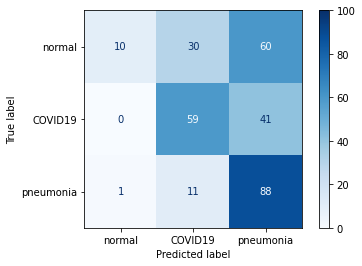

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['normal', 'COVID19', 'pneumonia']))
disp.plot(cmap='Blues') 
disp.ax_.get_images()[0].set_clim(0, 100)